#Tester

##Import Dataset

In [ ]:
import pandas as pd

In [ ]:
dummy_glcm = pd.read_csv('flower.csv')

In [ ]:
X = dummy_glcm.drop('class', axis=1)
y = dummy_glcm['class']


In [ ]:
a = pd.read_csv('train1.csv')
b = pd.read_csv('test1.csv')

X_train = a.drop('class', axis=1)
X_test = b.drop('class', axis=1)

y_train = a['class']
y_test = b['class']

##Split Data (Train, Test)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_clf=KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred = knn_clf.predict(X_test)
pred

array(['sunflower', 'dandelion', 'dandelion', 'dandelion', 'sunflower',
       'dandelion', 'daisy', 'tulip', 'daisy', 'sunflower', 'sunflower',
       'rose', 'dandelion', 'rose', 'rose', 'rose', 'sunflower', 'daisy',
       'dandelion', 'dandelion', 'tulip', 'sunflower', 'daisy', 'daisy',
       'sunflower', 'sunflower', 'daisy', 'daisy'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, pred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, pred)
print('Classification Report:',result1)
result2 = accuracy_score(y_test,pred)
print('Accuracy:',result2)  

Confusion Matrix:
[[3 4 0 0 0]
 [0 0 1 5 1]
 [1 1 2 1 1]
 [1 1 0 0 0]
 [2 1 1 2 0]]
Classification Report:               precision    recall  f1-score   support

       daisy       0.43      0.43      0.43         7
   dandelion       0.00      0.00      0.00         7
        rose       0.50      0.33      0.40         6
   sunflower       0.00      0.00      0.00         2
       tulip       0.00      0.00      0.00         6

    accuracy                           0.18        28
   macro avg       0.19      0.15      0.17        28
weighted avg       0.21      0.18      0.19        28

Accuracy: 0.17857142857142858


In [ ]:
import numpy as np

error = []
acc = []
for i in range(1, 20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))
  acc.append(accuracy_score(y_test,pred_i))


In [ ]:
max(acc)

0.5128205128205128

##Test pake min max scaller

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
MinMaxScaler = preprocessing.MinMaxScaler()

In [ ]:
X_data_minmax = MinMaxScaler.fit_transform(X_train)
X_minmax_train = pd.DataFrame(X_data_minmax,columns=['mean', 'skewness', 'kurtosis', 'contrast', 'correlation', 'energy', 'homogeneity'])

train_data_minmax = MinMaxScaler.fit_transform(X_test)
X_minmax_test = pd.DataFrame(train_data_minmax,columns=['mean', 'skewness', 'kurtosis', 'contrast', 'correlation', 'energy', 'homogeneity'])

In [ ]:
import numpy as np

error = []
acc = []
for i in range(1, 20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_minmax_train, y_train)
  pred_i = knn.predict(X_minmax_test)
  error.append(np.mean(pred_i != y_test))
  acc.append(accuracy_score(y_test,pred_i))

In [ ]:
max(acc)

0.46153846153846156

In [ ]:
X.shape

(138, 7)

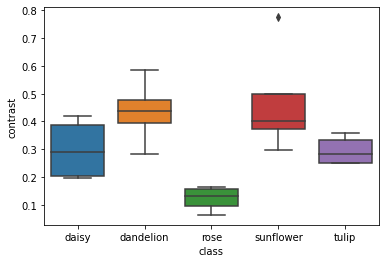

In [ ]:
import seaborn as sn
sn.boxplot(x='class', y='contrast', data=a);

#KNN dengan fitur GLCM 1

##Import Dataset

In [ ]:
import pandas as pd

In [ ]:
dummy_glcm = pd.read_csv('glcm1.csv')

In [ ]:
X = dummy_glcm.drop('class', axis=1)
y = dummy_glcm['class']


##Split Data (Train, Test)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

##KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_clf=KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred = knn_clf.predict(X_test)
pred

array(['rose', 'daisy', 'daisy', ..., 'rose', 'daisy', 'dandelion'],
      dtype=object)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, pred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, pred)
print('Classification Report:',result1)
result2 = accuracy_score(y_test,pred)
print('Accuracy:',result2)  

Confusion Matrix:
[[ 86  65  39   9  26]
 [102 103  46  19  48]
 [ 65  66  43  23  37]
 [ 70  69  32  26  31]
 [ 88  92  40  19  52]]
Classification Report:               precision    recall  f1-score   support

       daisy       0.21      0.38      0.27       225
   dandelion       0.26      0.32      0.29       318
        rose       0.21      0.18      0.20       234
   sunflower       0.27      0.11      0.16       228
       tulip       0.27      0.18      0.21       291

    accuracy                           0.24      1296
   macro avg       0.24      0.24      0.23      1296
weighted avg       0.25      0.24      0.23      1296

Accuracy: 0.23919753086419754


In [ ]:
import numpy as np

error = []
acc = []
for i in range(1, 100):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))
  acc.append(accuracy_score(y_test,pred_i))

In [ ]:
max(acc)

0.2854938271604938

In [ ]:
#Get the index
import numpy as np
np.argmax(acc)

22

##Test pake min max scaller

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
MinMaxScaler = preprocessing.MinMaxScaler()

In [ ]:
X_data_minmax = MinMaxScaler.fit_transform(X_train)
X_minmax_train1 = pd.DataFrame(X_data_minmax,columns=['mean', 'skewness', 'kurtosis'])

train_data_minmax = MinMaxScaler.fit_transform(X_test)
X_minmax_test1 = pd.DataFrame(train_data_minmax,columns=['mean', 'skewness', 'kurtosis'])

In [ ]:
import numpy as np

error = []
acc = []
for i in range(1, 100):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_minmax_train1, y_train)
  pred_i = knn.predict(X_minmax_test1)
  error.append(np.mean(pred_i != y_test))
  acc.append(accuracy_score(y_test,pred_i))

In [ ]:
max(acc)

0.2638888888888889

##GRAPH

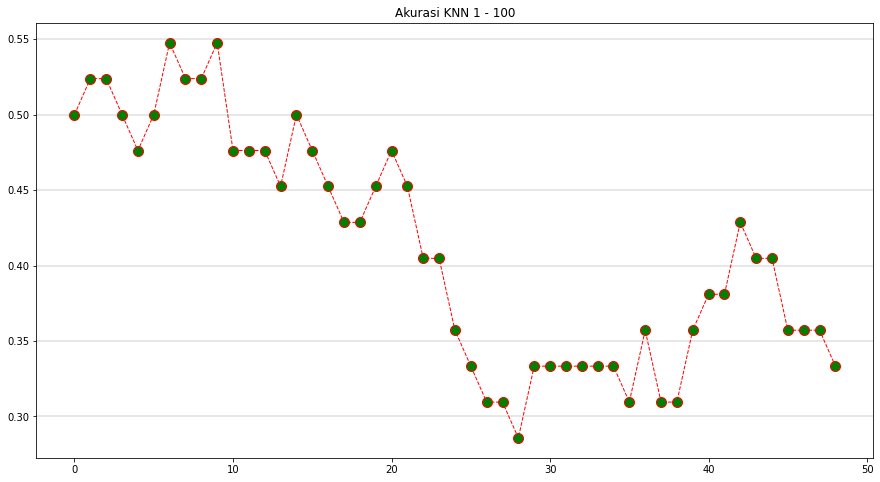

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(acc,color='red', linestyle='dashed', linewidth = 1,
         marker='o', markerfacecolor='green', markersize=10)
plt.grid(True, linestyle='-', linewidth=2, alpha=0.3, axis='y')
plt.title('Akurasi KNN 1 - 100')
plt.show()

#KNN dengan fitur GLCM 2

##Import Dataset

In [ ]:
import pandas as pd

In [ ]:
dummy_glcm = pd.read_csv('glcm2.csv')

In [ ]:
X = dummy_glcm.drop('class', axis=1)
y = dummy_glcm['class']


##Split Data (Train, Test)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

##KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_clf=KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred = knn_clf.predict(X_test)
pred

array(['dandelion', 'dandelion', 'sunflower', ..., 'rose', 'daisy',
       'dandelion'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, pred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, pred)
print('Classification Report:',result1)
result2 = accuracy_score(y_test,pred)
print('Accuracy:',result2)  

Confusion Matrix:
[[ 99  66  19  16  32]
 [ 90 103  47  26  39]
 [ 59  94  31  27  32]
 [ 52  52  29  37  40]
 [ 78  89  36  42  61]]
Classification Report:               precision    recall  f1-score   support

       daisy       0.26      0.43      0.32       232
   dandelion       0.25      0.34      0.29       305
        rose       0.19      0.13      0.15       243
   sunflower       0.25      0.18      0.21       210
       tulip       0.30      0.20      0.24       306

    accuracy                           0.26      1296
   macro avg       0.25      0.25      0.24      1296
weighted avg       0.25      0.26      0.25      1296

Accuracy: 0.25540123456790126


In [ ]:
import numpy as np

error = []
acc = []
for i in range(1, 100):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))
  acc.append(accuracy_score(y_test,pred_i))

In [ ]:
max(acc)

0.31558641975308643

##Test pake min max scaller

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
MinMaxScaler = preprocessing.MinMaxScaler()

In [ ]:
X_data_minmax = MinMaxScaler.fit_transform(X_train)
X_minmax_train2 = pd.DataFrame(X_data_minmax,columns=['contrast', 'correlation', 'energy', 'homogeneity'])

train_data_minmax = MinMaxScaler.fit_transform(X_test)
X_minmax_test2 = pd.DataFrame(train_data_minmax,columns=['contrast', 'correlation', 'energy', 'homogeneity'])

In [ ]:
import numpy as np

error = []
acc = []
for i in range(1, 100):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_minmax_train2, y_train)
  pred_i = knn.predict(X_minmax_test2)
  error.append(np.mean(pred_i != y_test))
  acc.append(accuracy_score(y_test,pred_i))

In [ ]:
max(acc)

0.33719135802469136

##GRAPH

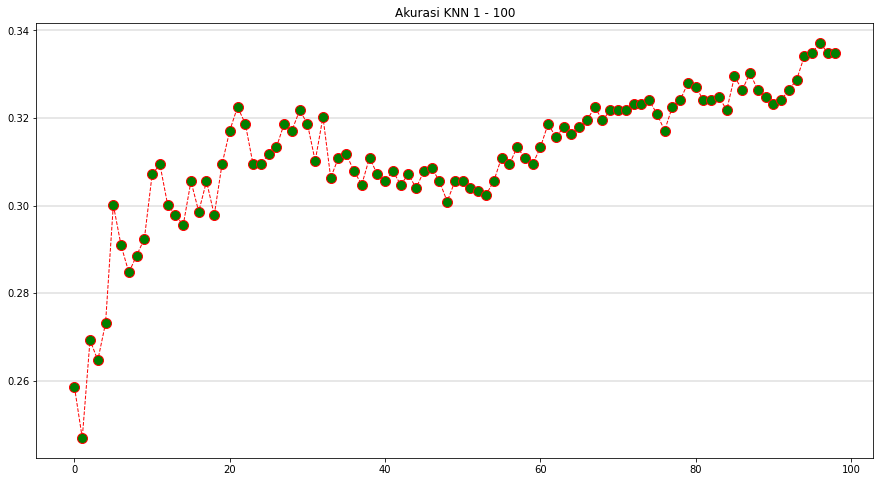

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(acc,color='red', linestyle='dashed', linewidth = 1,
         marker='o', markerfacecolor='green', markersize=10)
plt.grid(True, linestyle='-', linewidth=2, alpha=0.3, axis='y')
plt.title('Akurasi KNN 1 - 100')
plt.show()

#KNN dengan fitur GLCM 1 dan GLCM 2

##Import Dataset

In [ ]:
import pandas as pd

In [ ]:
dummy_glcm = pd.read_csv('glcm.csv')

In [ ]:
X = dummy_glcm.drop('class', axis=1)
y = dummy_glcm['class']


##Split Data (Train, Test)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

##KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_clf=KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred = knn_clf.predict(X_test)
pred

array(['daisy', 'daisy', 'dandelion', ..., 'daisy', 'dandelion',
       'dandelion'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, pred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, pred)
print('Classification Report:',result1)
result2 = accuracy_score(y_test,pred)
print('Accuracy:',result2)  

Confusion Matrix:
[[ 93  76  26  16  28]
 [ 88 116  43  24  30]
 [ 74  84  40  17  34]
 [ 46  66  29  38  34]
 [ 81  92  38  27  56]]
Classification Report:               precision    recall  f1-score   support

       daisy       0.24      0.39      0.30       239
   dandelion       0.27      0.39      0.32       301
        rose       0.23      0.16      0.19       249
   sunflower       0.31      0.18      0.23       213
       tulip       0.31      0.19      0.24       294

    accuracy                           0.26      1296
   macro avg       0.27      0.26      0.25      1296
weighted avg       0.27      0.26      0.26      1296

Accuracy: 0.2646604938271605


In [ ]:
import numpy as np

error = []
acc = []
for i in range(1, 100):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))
  acc.append(accuracy_score(y_test,pred_i))

In [ ]:
max(acc)

0.2962962962962963

##Test pake min max scaller

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
MinMaxScaler = preprocessing.MinMaxScaler()

In [ ]:
X_data_minmax = MinMaxScaler.fit_transform(X_train)
X_minmax_train = pd.DataFrame(X_data_minmax,columns=['mean', 'skewness', 'kurtosis', 'contrast', 'correlation', 'energy', 'homogeneity'])

train_data_minmax = MinMaxScaler.fit_transform(X_test)
X_minmax_test = pd.DataFrame(train_data_minmax,columns=['mean', 'skewness', 'kurtosis', 'contrast', 'correlation', 'energy', 'homogeneity'])

In [ ]:
import numpy as np

error = []
acc = []
for i in range(1, 50):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_minmax_train, y_train)
  pred_i = knn.predict(X_minmax_test)
  error.append(np.mean(pred_i != y_test)*100)
  acc.append(accuracy_score(y_test,pred_i)*100)

In [ ]:
max(acc)

33.33333333333333

##GRAPH

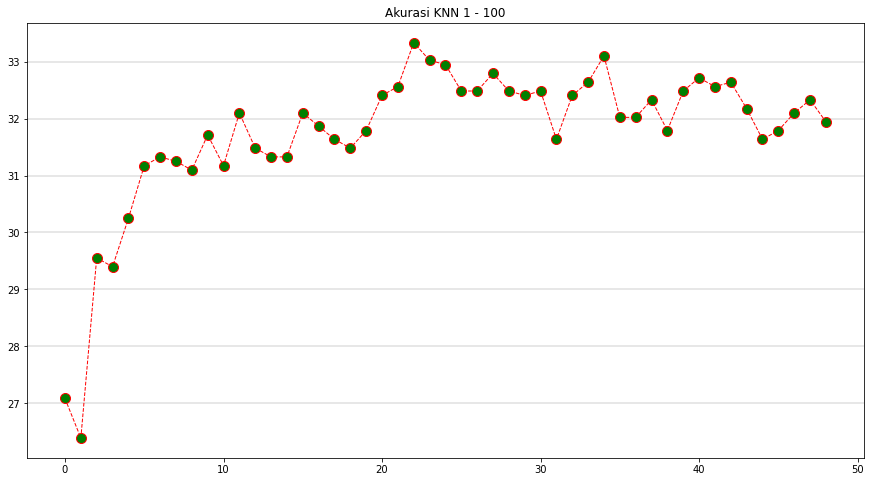

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(acc,color='red', linestyle='dashed', linewidth = 1,
         marker='o', markerfacecolor='green', markersize=10)
plt.grid(True, linestyle='-', linewidth=2, alpha=0.3, axis='y')
plt.title('Akurasi KNN 1 - 100')
plt.show()

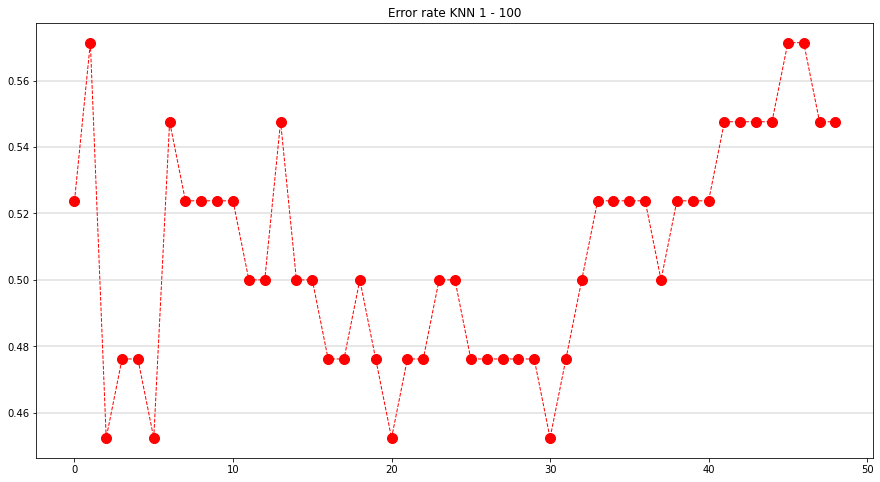

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(error,color='red', linestyle='dashed', linewidth = 1,
         marker='o', markerfacecolor='red', markersize=10)
plt.grid(True, linestyle='-', linewidth=2, alpha=0.3, axis='y')
plt.title('Error rate KNN 1 - 100')
plt.show()